
<center><em>Extracted from Pierian Inc.</em></center>


# Statsmodels Time Series Examples
Data source is from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

<

In [0]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.filters.hp_filter import hpfilter
from statsmodels.tsa.seasonal import seasonal_decompose
from google.colab import drive
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing
%matplotlib inline

#Mounting drive to access Google Drive
drive.mount('/content/drive')

#Converting to DataFrame and sorting values
data=pd.read_csv('/content/drive/My Drive/Colab Notebooks/EnergyProduction.csv', parse_dates=True, index_col=0)

data.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


In [0]:
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq=None)

### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [0]:
data.index.freq='MS'
data.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

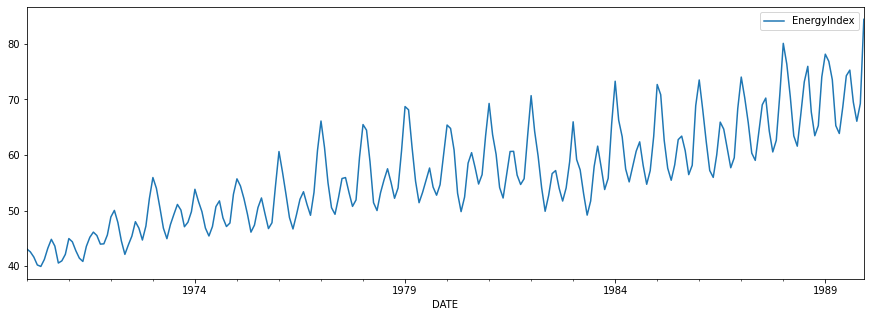

In [0]:
data.plot(figsize=(15,5))


### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

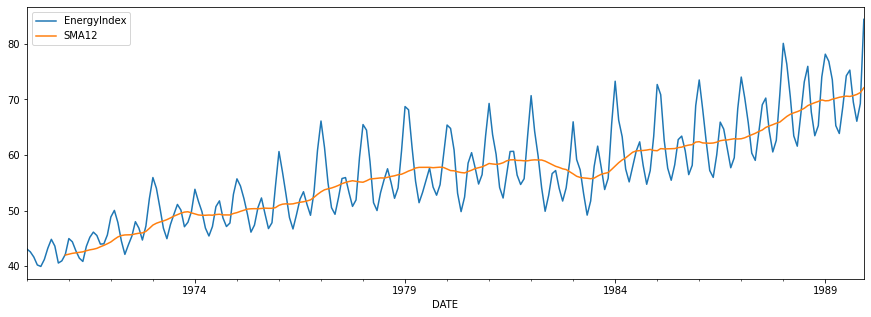

In [0]:

data['SMA12']=data.rolling(window=12).mean()
data.plot(figsize=(15,5));

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

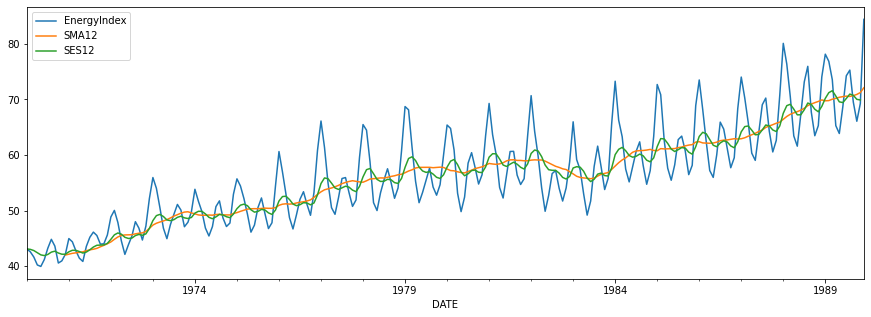

In [0]:
data['SES12']=SimpleExpSmoothing(data['EnergyIndex']).fit(smoothing_level=2/(12+1),optimized=False).fittedvalues.shift(-1)
data.plot(figsize=(15,5));

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


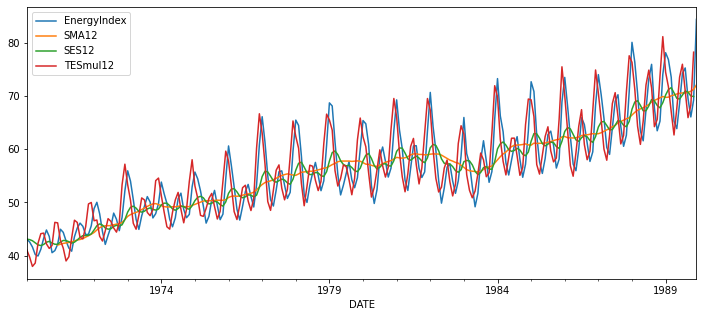

In [0]:
data['TESmul12']=ExponentialSmoothing(data['EnergyIndex'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues.shift(-1)
data.plot(figsize=(12,5));



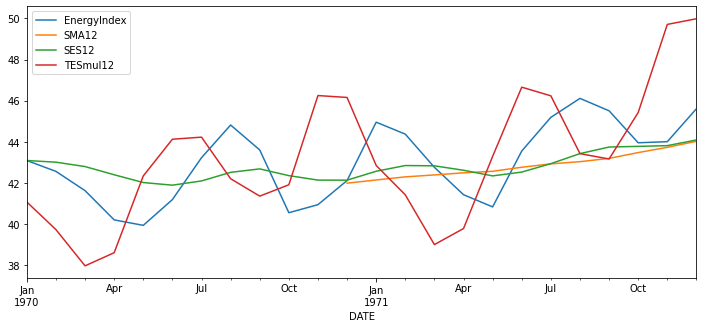

In [0]:
data[['EnergyIndex', 'SMA12','SES12','TESmul12']].iloc[:24].plot(figsize=(12,5));